# PLS Study (2019.10.29(화))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 함수 정의 : PLS1

In [2]:
def PLS1(X, y, l):
    Xdeflate = X
    w = Xdeflate.T*y / np.linalg.norm(Xdeflate.T*y)
    for k in range(l):
        t = Xdeflate * w
        tscale = t.T * t
        t = t / tscale
        p = Xdeflate.T * t
        q = y.T * t
        if q[0,0] == 0:
            l = k
            print('break')
            break
        if k <= l - 1:
            Xdeflate = Xdeflate - tscale[0,0] * t * p.T
            w = Xdeflate.T * y
            if k == 0:
                W = w
                P = p
                Q = np.mat(q[0,0])
                T = t
            else:
                W = np.c_[W, w]
                P = np.c_[P, p]
                Q = np.c_[Q, q]
                T = np.c_[T, t]
    print('W = \n', W)
    print('P = \n', P)
    print('Q = \n', Q)
    print('T = \n', T)
    B = W * (P.T*W).I*Q.T
    B0 = Q[0,0] - P[:,0].T * B
    print('B = \n', B)
    print('B0 = \n', B0)
    return B, B0, W, P, Q, T

## 결과 표시

In [3]:
def EvalPLS(X,y,l):
    B, B0, W, P, Q, T = PLS1(X,y, l)
    y_hat = X*B+B0
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(16,6)
    axes[0].plot(y, y_hat, 'o')
    Y = np.c_[y, y_hat]
    df_Y = pd.DataFrame(Y)
    print(df_Y.corr())
    y_block = T*Q.T
    F = y - y_block
    axes[1].plot(y, y_block, 'o')
    print('F mean = ', np.mean(F))
    return B, B0, W, P, Q, T

## NIPALS

In [16]:
def NIPALS(X,y,l):
    Xdeflate = X
    Ydeflate = y
    for k in range(l):
        w = Xdeflate.T*Ydeflate / np.linalg.norm(Xdeflate.T*Ydeflate)
        t = Xdeflate*w
        p = ((t.T*t).I*(t.T*Xdeflate)).T
        b = (t.T*t).I*(t.T*Ydeflate)
        Xdeflate = Xdeflate - t*p.T
        Ydeflate = Ydeflate - t*b
        if k == 0:
            W = w
            P = p
            B = np.mat(b[0,0])
            T = t
        else:
            W = np.c_[W, w]
            P = np.c_[P, p]
            B = np.c_[B, b]
            T = np.c_[T, t]

    print('W = \n', W)
    print('P = \n', P)
    print('B = \n', B)
    print('T = \n', T)
    y_hat = T*B.T
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(16,6)
    axes[0].plot(y, y_hat, 'o')
    Y = np.c_[y, y_hat]
    df_Y = pd.DataFrame(Y)
    print(df_Y.corr())
    return W, P, B, T

## 1. 예제 데이터

In [4]:
ex_X = np.mat([[-1.193,	1.5012,	-1.03], [-0.037,	0.354,	-0.7647], [-0.5919,	-0.091,	-0.3257], [0.3792,	-0.714,	1.0739], [1.4427,	-1.0502,	1.0464]])
ex_X = ex_X[:,[0,2,1]]
ex_X # 5x3

matrix([[-1.193 , -1.03  ,  1.5012],
        [-0.037 , -0.7647,  0.354 ],
        [-0.5919, -0.3257, -0.091 ],
        [ 0.3792,  1.0739, -0.714 ],
        [ 1.4427,  1.0464, -1.0502]])

In [5]:
ex_y = np.mat([[-1.1841], [-0.2161], [-0.5457], [0.5485], [1.3973]])
ex_y # 5x1

matrix([[-1.1841],
        [-0.2161],
        [-0.5457],
        [ 0.5485],
        [ 1.3973]])

W = 
 [[  2.45079377e-01  -1.07276611e-03  -7.30533472e-17]
 [ -1.27149437e-01   3.88835269e-02  -4.84785823e-17]
 [  1.39993270e-01   3.71941553e-02   7.58157426e-17]]
P = 
 [[  0.57287314   2.56866036  -0.3703683 ]
 [  0.57572088  -1.7325963   13.4243855 ]
 [ -0.58534733   1.07273497  12.84113655]]
Q = 
 [[ 0.59006555  1.63785752  2.99408552]]
T = 
 [[ -0.19502798   0.29173073  18.17399067]
 [ -0.05879648   2.19064796 -13.08012182]
 [ -0.04460955  -2.11308683 -19.79628808]
 [  0.11181812  -2.14339169  11.37386224]
 [  0.18661084   1.77430313   3.32490926]]
B = 
 [[ 0.79622434]
 [ 0.23900393]
 [ 0.00626899]]
B0 = 
 [[ -1.11022302e-16]]
          0         1
0  1.000000  0.999985
1  0.999985  1.000000
F mean =  0.00209832804756


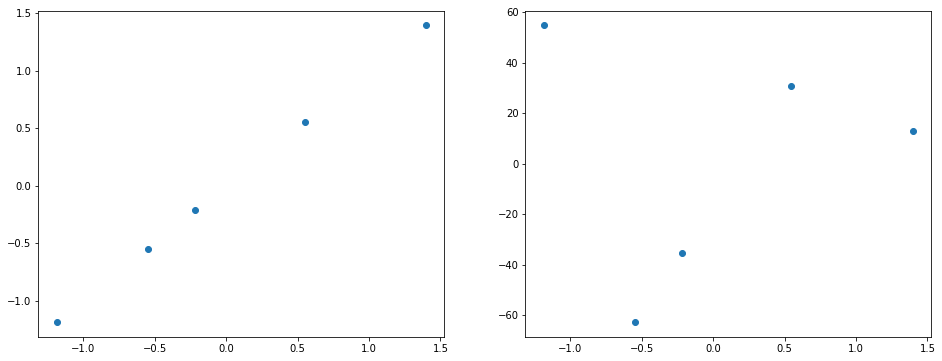

In [6]:
B, B0, W, P, Q, T = EvalPLS(ex_X,ex_y, 3)

W = 
 [[  1.54042221e-01  -1.74321668e-16]
 [ -1.69120220e-01  -1.53607682e-16]]
P = 
 [[ 0.71059062  2.94363261]
 [ 0.70489572 -3.23176198]]
Q = 
 [[ 0.7299359   1.57584675]]
T = 
 [[-0.21429915 -0.75108815]
 [-0.07375917  3.56356494]
 [-0.08934909 -1.2798366 ]
 [ 0.13648852 -3.41545355]
 [ 0.24090973  1.88330287]]
B = 
 [[ 0.79374475]
 [ 0.23536578]]
B0 = 
 [[  1.11022302e-16]]
          0         1
0  1.000000  0.999983
1  0.999983  1.000000
F mean =  -0.000172939254221


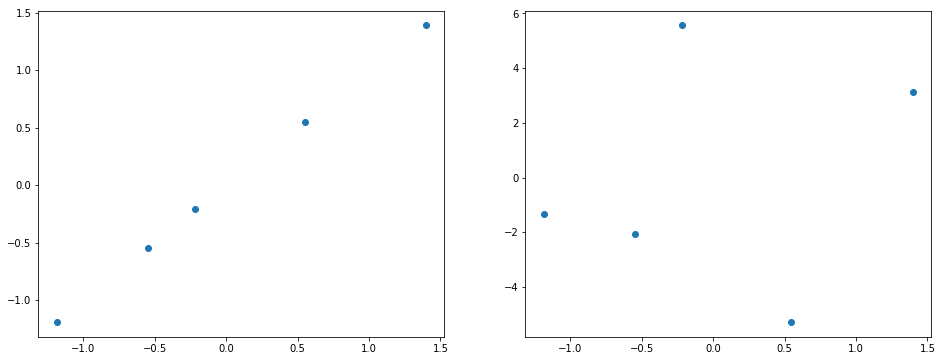

In [7]:
B, B0, W, P, Q, T = EvalPLS(ex_X[:,[0,1]],ex_y, 2)

W = 
 [[ 0.61059034  0.79169572 -0.01993285]
 [ 0.55615285 -0.41073903  0.72248699]
 [-0.56380266  0.45222929  0.69109712]]
P = 
 [[ 0.57287314  0.79516115 -0.01993285]
 [ 0.57572088 -0.536347    0.72248699]
 [-0.58534733  0.33207861  0.69109712]]
B = 
 [[ 0.59006555  0.50701941  0.16113869]]
T = 
 [[-2.14765227  0.05513845  0.32667938]
 [-0.64746807  0.41404252 -0.23511655]
 [-0.49124136 -0.39938311 -0.35584034]
 [ 1.2313435  -0.40511087  0.20444636]
 [ 2.05496258  0.33535143  0.05976559]]
          0         1
0  1.000000  0.999985
1  0.999985  1.000000


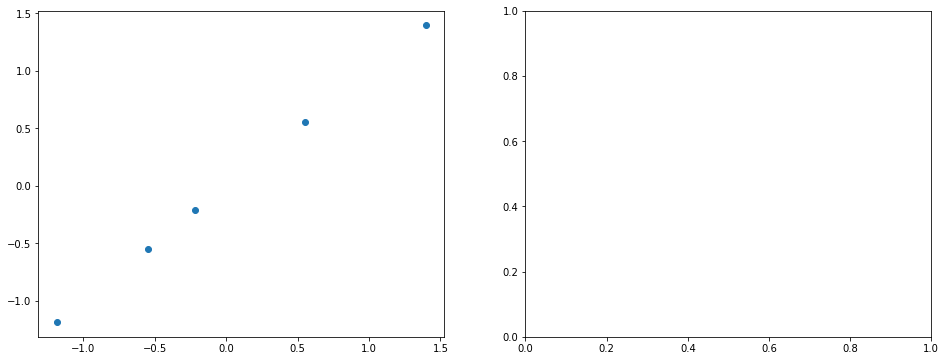

In [19]:
W, P, B, T = NIPALS(ex_X,ex_y, 3)

W = 
 [[ 0.73929446  0.67338229]
 [ 0.67338229 -0.73929446]]
P = 
 [[ 0.71059062  0.67338229]
 [ 0.70489572 -0.73929446]]
B = 
 [[ 0.7299359   0.36048904]]
T = 
 [[-1.57556204 -0.10903226]
 [-0.54228933  0.5173075 ]
 [-0.656909   -0.18578841]
 [ 1.0034857  -0.49580681]
 [ 1.77120734  0.27339104]]
          0         1
0  1.000000  0.999983
1  0.999983  1.000000


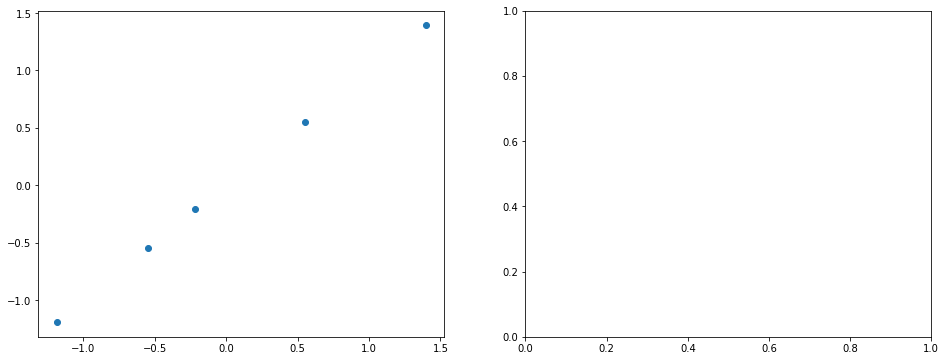

In [18]:
W, P, B, T = NIPALS(ex_X[:,[0,1]],ex_y, 2)

## Signe-S 결과

In [17]:
s_T = np.mat([[-1.21788456023991,-0.0325283580170382],[-0.439982206094296,0.419671643436694],[-0.502511032773304,-0.122545876853121],[0.796895482183825,-0.418264476213434],[1.36348231692368,0.153667067646899]])
print('T = ', s_T)

T =  [[-1.21788456 -0.03252836]
 [-0.43998221  0.41967164]
 [-0.50251103 -0.12254588]
 [ 0.79689548 -0.41826448]
 [ 1.36348232  0.15366707]]


In [18]:
s_P = np.mat([[0.69041931822398,0.307720114473186],[0.72492492415778,-1.08930667220358]])
print('P = ', s_P)

P =  [[ 0.69041932  0.30772011]
 [ 0.72492492 -1.08930667]]


In [19]:
s_Q = np.mat([0.939011157015289,0.498013041308944])
print('Q = \n', s_Q) # 1x2

Q = 
 [[ 0.93901116  0.49801304]]


In [20]:
s_W = np.mat([[0.722795977563944,0.691061484107877],[0.691061484107878,-0.722795977563944]])
print('W = \n', s_W)

W = 
 [[ 0.72279598  0.69106148]
 [ 0.69106148 -0.72279598]]


In [21]:
s_B = np.mat([[0.774022057113114],[0.229517488097672]])
print('B = \n', s_B)

B = 
 [[ 0.77402206]
 [ 0.22951749]]


In [22]:
s_B0 = np.mat(-1.5409650238027E-05)
print('B0 = \n', s_B0)

B0 = 
 [[ -1.54096502e-05]]


In [29]:
y_hat = ex_X[:,[0,1]]*B+B0
print('y_predicted = \n', y_hat)

y_predicted = 
 [[-1.18936423]
 [-0.20935276]
 [-0.54647615]
 [ 0.55374731]
 [ 1.39142229]]


In [24]:
ex_X

matrix([[-1.193 , -1.03  ,  1.5012],
        [-0.037 , -0.7647,  0.354 ],
        [-0.5919, -0.3257, -0.091 ],
        [ 0.3792,  1.0739, -0.714 ],
        [ 1.4427,  1.0464, -1.0502]])

In [31]:
T*P.T

matrix([[ -2.36320654,   2.27627958],
        [ 10.43741337, -11.56858618],
        [ -3.83085937,   4.07314546],
        [ -9.95685298,  11.1341431 ],
        [  5.71493993,  -5.91657037]])

In [32]:
s_T*s_P.T

matrix([[-0.85086066, -0.84744152],
        [-0.17463081, -0.77610519],
        [-0.38465316, -0.23079273],
        [ 0.42148364,  1.03330768],
        [ 0.98866098,  0.82103175]])

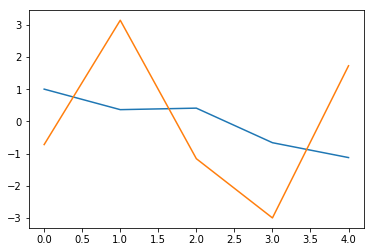

In [34]:
plt.plot(T-s_T)

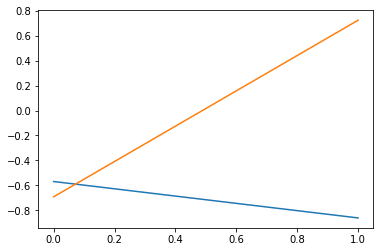

In [38]:
plt.plot(W-s_W)